
# Machine learning project 1 regression 
## Predicting number of delays of the flights 

## Introduction

### Problem Statement

In [2]:
# Data uploading, preprocessing & visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Scaling
from sklearn.preprocessing import StandardScaler

# Splitting train and validation dataset
from sklearn.model_selection import train_test_split

# Regression models
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    ElasticNet
)
# Calculating MAPE
from sklearn.metrics import mean_absolute_percentage_error


## Loading data

In [3]:
train_data = pd.read_csv('delays_train.csv')
test_data = pd.read_csv('delays_test.csv')

## Data overview 

### Train data 

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631327 entries, 0 to 1631326
Data columns (total 28 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Weekday                    1631327 non-null  int64  
 1   Month_of_Year              1631327 non-null  int64  
 2   Day_of_Month               1631327 non-null  int64  
 3   Scheduled_Departure_Time   1631327 non-null  int64  
 4   Scheduled_Arrival_Time     1631327 non-null  int64  
 5   Marketing_Airline          1467776 non-null  object 
 6   Marketing_Airline_DOT_ID   1631327 non-null  int64  
 7   Flight_Number              1631327 non-null  int64  
 8   Origin_Airport_ID          1631327 non-null  int64  
 9   Destination_Airport_ID     1468233 non-null  float64
 10  Flight_Cancelled           1631327 non-null  bool   
 11  Departure_State            1631327 non-null  object 
 12  Arrival_State              1631327 non-null  object 
 13  Departure_De

In [5]:
train_data.head()

,Weekday,Month_of_Year,Day_of_Month,Scheduled_Departure_Time,Scheduled_Arrival_Time,Marketing_Airline,Marketing_Airline_DOT_ID,Flight_Number,Origin_Airport_ID,Destination_Airport_ID,...,Flight_Diverted,Actual_Departure_Time,Flight_Duration,Flight_Distance,Origin_Temperature,Destination_Temperature,Origin_Wind_Speed,Destination_Wind_Speed,Origin_Precipitation,Destination_Precipitation
0,6,6,25,1222,1444,B6,20409,520,10397,12478.0,...,False,1224.0,107.0,760.0,25.140220,19.357739,21.019808,15.452723,0.0,0.0
1,2,6,21,1216,1304,NaN,19805,6297,14107,15376.0,...,False,1216.0,23.0,110.0,13.279939,20.470690,18.045064,12.910265,0.0,0.0
2,3,1,5,1945,2055,DL,19790,4124,13487,13076.0,...,False,1945.0,36.0,119.0,17.816202,13.967273,21.606228,17.976362,0.0,0.1
3,2,3,22,700,924,AA,19805,1538,15624,11298.0,...,False,658.0,125.0,641.0,24.562566,14.509228,24.946489,22.630553,0.0,0.0
4,4,7,14,2130,2359,NaN,19930,1116,14747,12889.0,...,False,2133.0,130.0,867.0,8.817992,10.866812,17.426336,17.401007,0.0,0.0


In [6]:
round(train_data.describe().T,2)

#or 
# train_data.describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,1631327.0,4.01,2.01,1.00,2.00,4.00,6.00,7.00
Month_of_Year,1631327.0,4.08,2.00,1.00,2.00,4.00,6.00,7.00
Day_of_Month,1631327.0,15.72,8.76,1.00,8.00,16.00,23.00,31.00
Scheduled_Departure_Time,1631327.0,1329.79,490.39,1.00,915.00,1320.00,1735.00,2359.00
Scheduled_Arrival_Time,1631327.0,1486.05,518.65,1.00,1103.00,1512.00,1920.00,2359.00
Marketing_Airline_DOT_ID,1631327.0,19830.81,276.15,19393.00,19790.00,19805.00,19977.00,20436.00
Flight_Number,1631327.0,2561.29,1745.16,1.00,1106.00,2228.00,3874.00,9680.00
Origin_Airport_ID,1631327.0,12660.01,1522.94,10135.00,11292.00,12889.00,14027.00,16869.00
Destination_Airport_ID,1468233.0,12658.28,1521.78,10135.00,11292.00,12889.00,14027.00,16869.00
Departure_Delay,1424866.0,13.11,53.96,-78.33,-5.08,-1.57,10.71,7223.21


Based on the summary statistics, it is observed that the numerical variables have varying scales. While some variables have relatively small ranges (e.g., Origin_Precipitation), others have larger ranges (e.g., Flight_distance). Therefore, it is beneficial to scale the variables before applying regression to ensure that their magnitudes do not disproportionately influence the model's results.

In [7]:
train_data.isnull().sum()

Weekday                           0
Month_of_Year                     0
Day_of_Month                      0
Scheduled_Departure_Time          0
Scheduled_Arrival_Time            0
Marketing_Airline            163551
Marketing_Airline_DOT_ID          0
Flight_Number                     0
Origin_Airport_ID                 0
Destination_Airport_ID       163094
Flight_Cancelled                  0
Departure_State                   0
Arrival_State                     0
Departure_Delay              206461
Arrival_Delay                211306
Diverted_Airport_Landings         0
Taxi_Out_Time                 49225
Taxi_In_Time                  49867
Flight_Diverted                   0
Actual_Departure_Time         48326
Flight_Duration              211490
Flight_Distance              163190
Origin_Temperature           163190
Destination_Temperature      163190
Origin_Wind_Speed            211490
Destination_Wind_Speed       211490
Origin_Precipitation              0
Destination_Precipitation   

Based on the count of missing values in each variable, it can be seen that several variables have missing values, including Marketing_Airline, Destination_Airport_ID, Departure_Delay, Arrival_Delay, and so on. Therefore, it is necessary to consider data imputation techniques to fill in these missing values before applying regression models to ensure complete and reliable analysis.

ConversionError: Failed to convert value(s) to axis units: 0           B6
1          NaN
2           DL
3           AA
4          NaN
          ... 
1631322     AS
1631323     AA
1631324     UA
1631325     AS
1631326     NK
Name: x, Length: 1631327, dtype: object

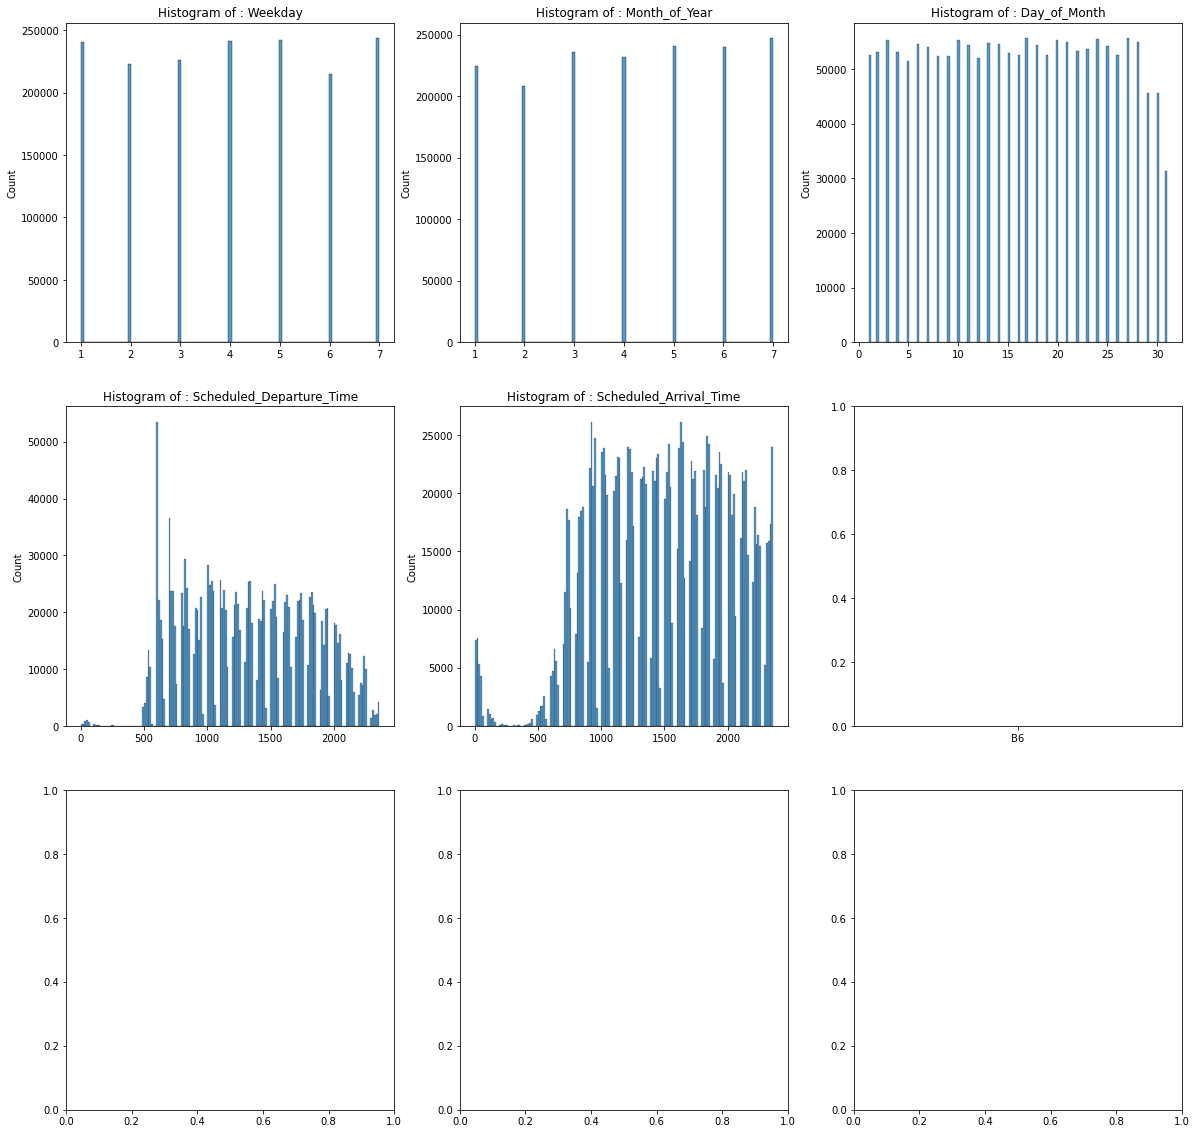

In [16]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(20, 20))
for i, ax in zip(train_data.columns, axes.flat):
    sns.histplot(x=train_data[i], ax=ax).set(title=f"Histogram of : {i}", xlabel="")
plt.show()

TypeError: Horizontal orientation requires numeric `x` variable.

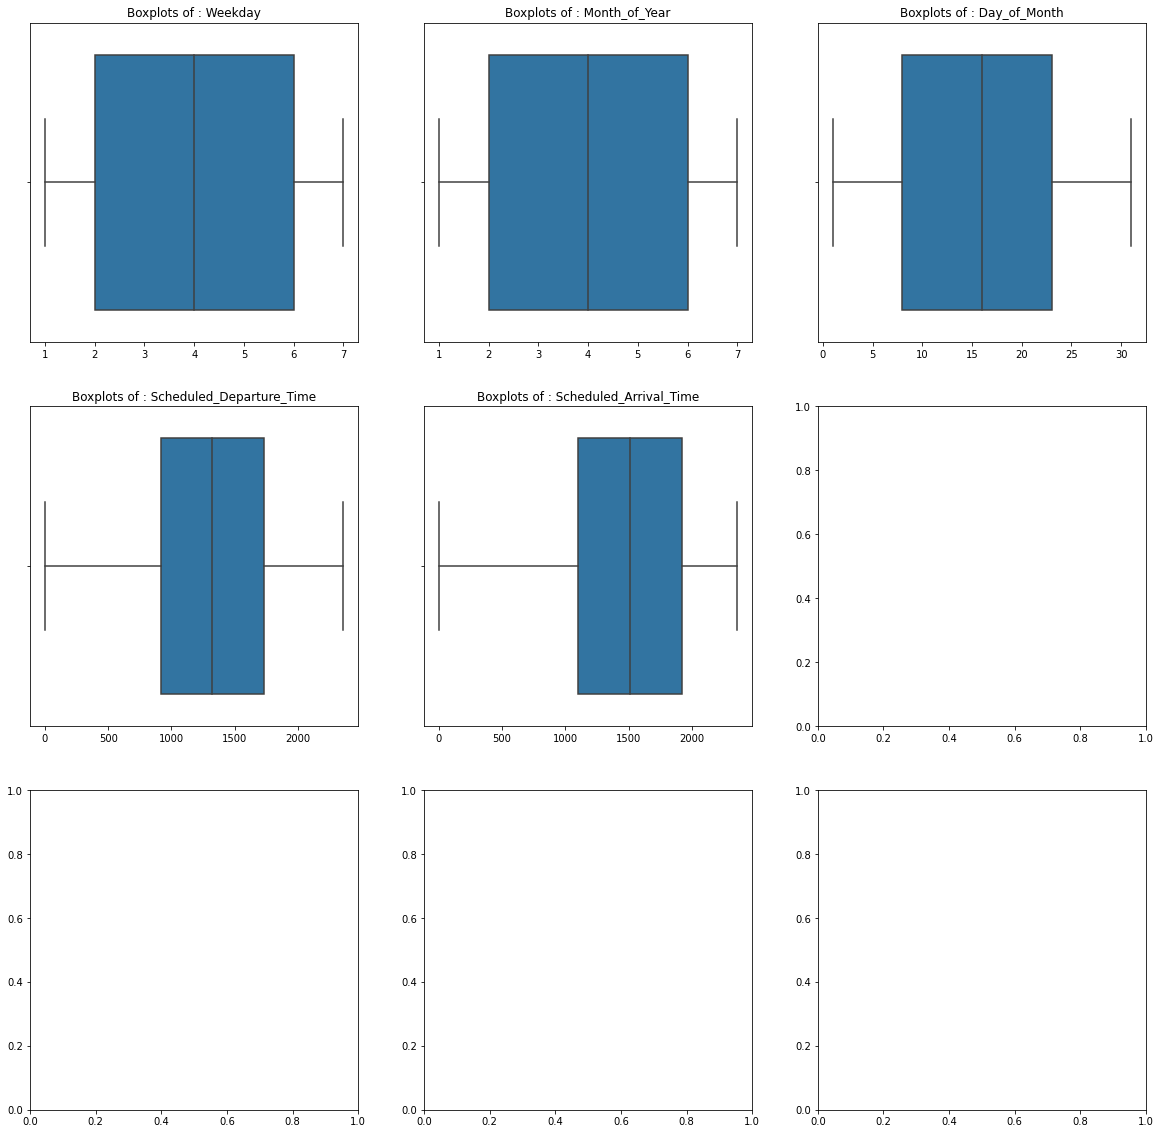

In [17]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(20, 20))
for i, ax in zip(train_data.columns, axes.flat):
    sns.boxplot(x=train_data[i], ax=ax).set(title=f"Boxplots of : {i}", xlabel="")
plt.show()

### Test data

In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407832 entries, 0 to 407831
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Weekday                    407832 non-null  int64  
 1   Month_of_Year              407832 non-null  int64  
 2   Day_of_Month               407832 non-null  int64  
 3   Scheduled_Departure_Time   407832 non-null  int64  
 4   Scheduled_Arrival_Time     407832 non-null  int64  
 5   Marketing_Airline          367468 non-null  object 
 6   Marketing_Airline_DOT_ID   407832 non-null  int64  
 7   Flight_Number              407832 non-null  int64  
 8   Origin_Airport_ID          407832 non-null  int64  
 9   Destination_Airport_ID     367011 non-null  float64
 10  Flight_Cancelled           407832 non-null  bool   
 11  Departure_State            407832 non-null  object 
 12  Arrival_State              407832 non-null  object 
 13  Departure_Delay            35

In [8]:
test_data.head()

,Weekday,Month_of_Year,Day_of_Month,Scheduled_Departure_Time,Scheduled_Arrival_Time,Marketing_Airline,Marketing_Airline_DOT_ID,Flight_Number,Origin_Airport_ID,Destination_Airport_ID,...,Flight_Diverted,Actual_Departure_Time,Flight_Duration,Flight_Distance,Origin_Temperature,Destination_Temperature,Origin_Wind_Speed,Destination_Wind_Speed,Origin_Precipitation,Destination_Precipitation
0,2,5,10,820,1011,AA,19805,4808,12478,14492.0,...,False,819.0,64.0,427.0,11.274087,16.012261,17.332261,24.629961,0.0,0.0
1,3,3,9,526,655,NaN,19790,3688,14489,14747.0,...,False,524.0,53.0,228.0,4.967302,18.358241,17.795975,15.307041,0.0,0.0
2,3,3,9,1651,1943,DL,19790,1713,14635,11433.0,...,False,1705.0,134.0,1084.0,18.483917,16.467901,18.704558,17.468001,0.0,0.0
3,5,4,15,1133,1245,UA,19977,4712,11298,11292.0,...,False,1146.0,107.0,641.0,12.932652,18.790894,14.105251,25.659088,2.0,1.0
4,3,5,11,1507,1752,NK,20416,1399,11618,13204.0,...,False,1737.0,125.0,937.0,18.982421,15.382372,22.579627,19.144705,0.0,0.0


In [9]:
round(test_data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Weekday,407832.0,4.01,2.01,1.00,2.00,4.00,6.00,7.00
Month_of_Year,407832.0,4.09,2.00,1.00,2.00,4.00,6.00,7.00
Day_of_Month,407832.0,15.73,8.76,1.00,8.00,16.00,23.00,31.00
Scheduled_Departure_Time,407832.0,1329.81,490.60,1.00,915.00,1320.00,1735.00,2359.00
Scheduled_Arrival_Time,407832.0,1486.57,518.38,1.00,1103.00,1513.00,1920.00,2359.00
Marketing_Airline_DOT_ID,407832.0,19831.31,275.77,19393.00,19790.00,19805.00,19977.00,20436.00
Flight_Number,407832.0,2567.98,1747.28,1.00,1107.00,2234.00,3890.00,9677.00
Origin_Airport_ID,407832.0,12657.36,1520.23,10135.00,11292.00,12889.00,14004.00,16869.00
Destination_Airport_ID,367011.0,12660.98,1523.75,10135.00,11292.00,12889.00,14027.00,16869.00
Departure_Delay,356043.0,13.06,52.33,-55.97,-5.07,-1.44,10.86,1912.42


In [10]:
test_data.isnull().sum()

Weekday                          0
Month_of_Year                    0
Day_of_Month                     0
Scheduled_Departure_Time         0
Scheduled_Arrival_Time           0
Marketing_Airline            40364
Marketing_Airline_DOT_ID         0
Flight_Number                    0
Origin_Airport_ID                0
Destination_Airport_ID       40821
Flight_Cancelled                 0
Departure_State                  0
Arrival_State                    0
Departure_Delay              51789
Diverted_Airport_Landings        0
Taxi_Out_Time                12264
Taxi_In_Time                 12430
Flight_Diverted                  0
Actual_Departure_Time        12016
Flight_Duration              52666
Flight_Distance              40725
Origin_Temperature           40725
Destination_Temperature      40725
Origin_Wind_Speed            52666
Destination_Wind_Speed       52666
Origin_Precipitation             0
Destination_Precipitation        0
dtype: int64

some histgram and box plot to check outliers and skewness?

### Correlation of the data

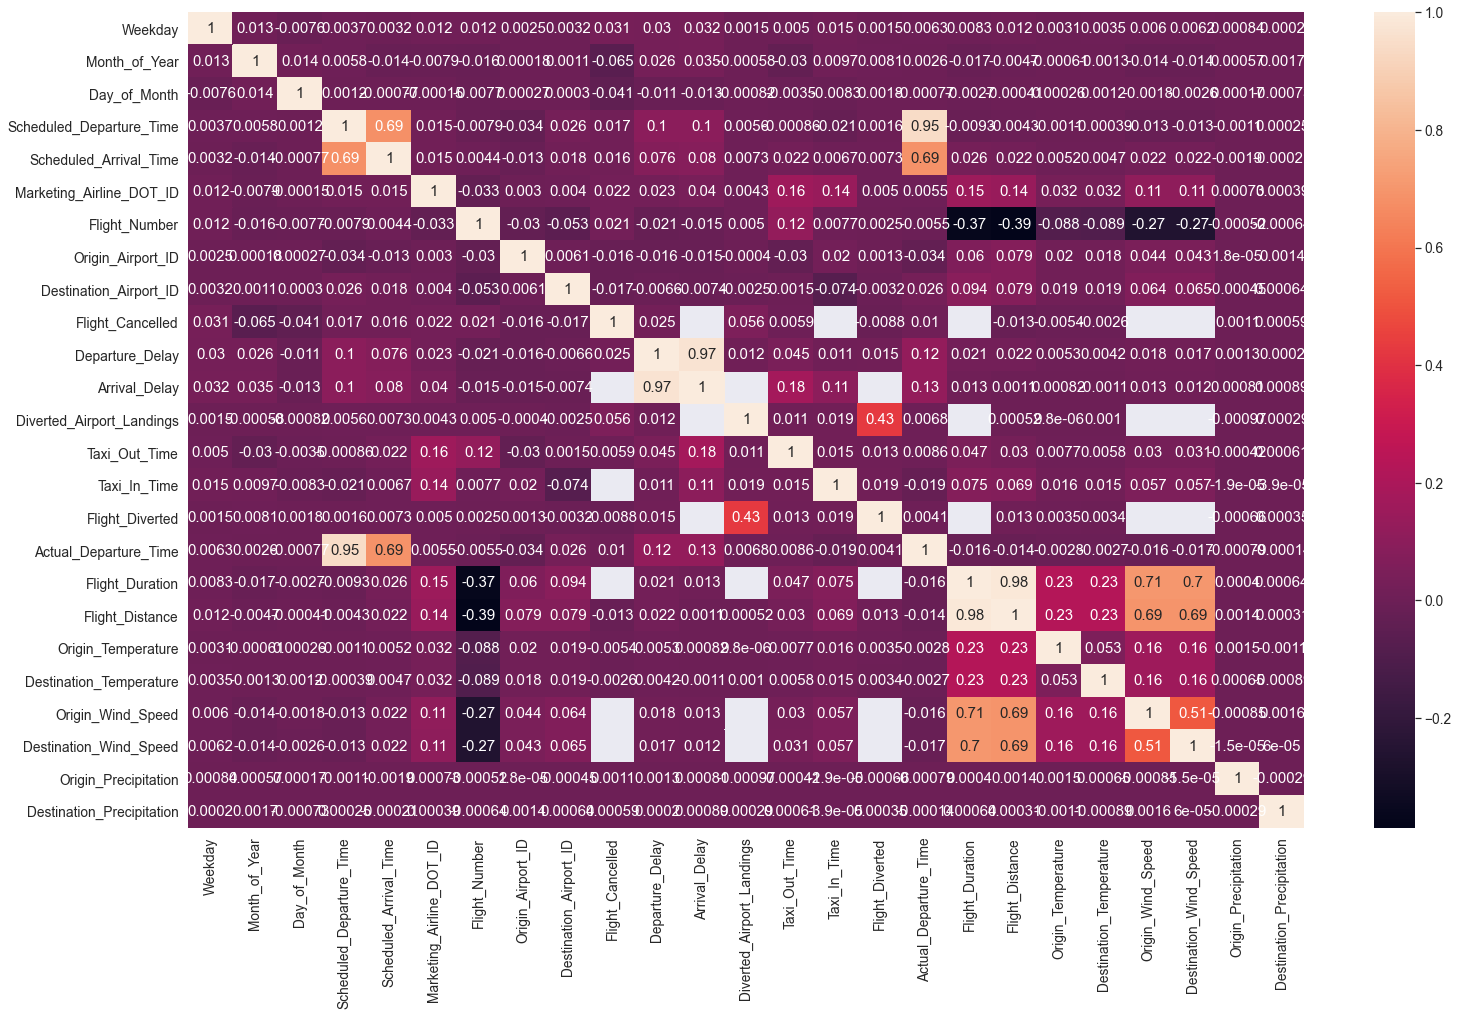

In [20]:
plt.figure(figsize=(25,15))
sns.set(font_scale=1.25)
sns.heatmap(train_data.corr(), annot=True) 
plt.show()


### Encoding

### Removing outliers

### Data imputation

### Scaling

### Data visualization 

## Regression models

In [ ]:
# Define the features and target variable
features = ['']
target = ''

# Split the data into training and validation sets
train_df, val_df = train_test_split(train_data, test_size=0.3, random_state=123)

# Separate features and target for training, validation, and testing
X_train = train_df[features]
y_train = train_df[target]
X_val = val_df[features]
y_val = val_df[target]
X_test = test_data[features]

# Define the regression algorithms
algorithms = [
    LinearRegression(),
    Ridge(alpha=0.5, random_state=123),
    Lasso(alpha=0.5, random_state=123),
    xgb.XGBRegressor(),
    RandomForestRegressor(n_estimators=150, max_depth=15, random_state=123)
]

# Iterate over the algorithms and print the MAPE results
for algorithm in algorithms:
    model_name = algorithm.__class__.__name__
    model = algorithm
    model.fit(X_train, y_train)
    val_predictions = model.predict(X_val)
    mape = mean_absolute_percentage_error(y_val, val_predictions)
    print(f"{model_name} MAPE on validation set: {mape * 100:.2f}%")
    
    # Predict test data and save the predictions as separate CSV files
    test_predictions = model.predict(X_test)
    
    # Create a DataFrame with the predictions
    predictions_df = pd.DataFrame({model_name: test_predictions})
    
    # Save the predictions to a CSV file
    predictions_df.to_csv(f'{model_name}_predictions.csv', index=False)

## Conclusion

## Refrences 